In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
train=pd.read_csv('titanic.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


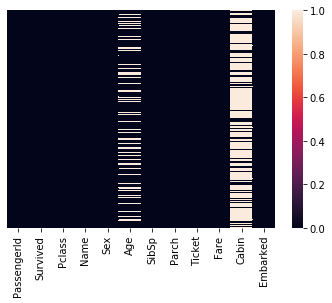

In [4]:
sns.heatmap(train.isnull(),yticklabels=False) # If True, plot the column names of the dataframe. If False, don't plot
    #the column names

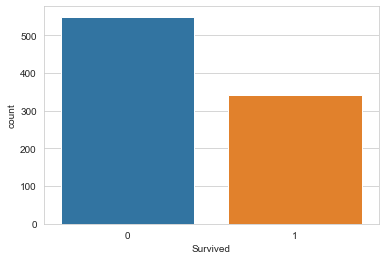

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

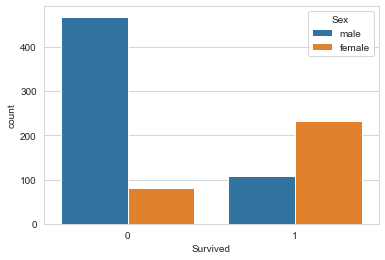

In [6]:
sns.countplot(x='Survived',hue='Sex',data=train)

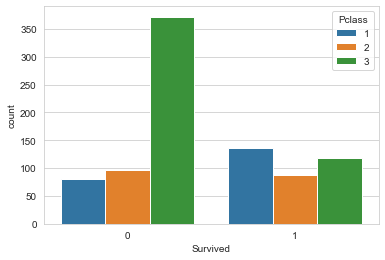

In [7]:
sns.countplot(x='Survived',data=train,hue='Pclass')

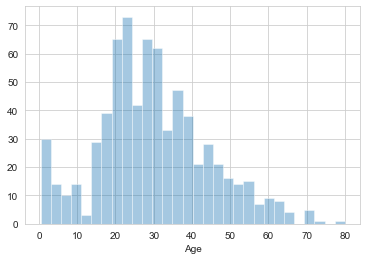

In [8]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30) #distplot() shows histogram
#bins is used to determine the the width of lines like blue line in our case

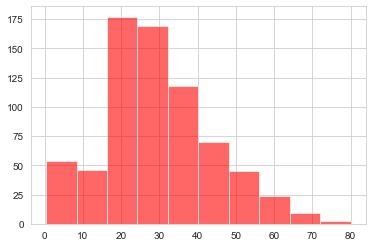

In [9]:
train['Age'].hist(alpha=0.6,color='r') # alpha is for colour intensity

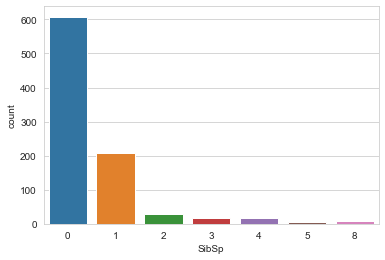

In [10]:
sns.countplot(x='SibSp',data=train)

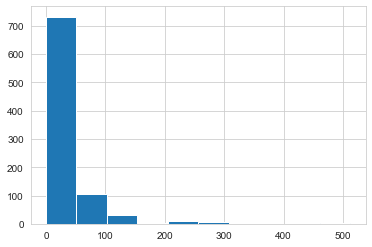

In [11]:
train['Fare'].hist()

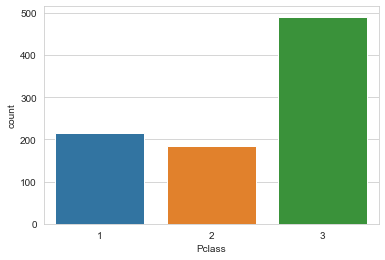

In [19]:
sns.countplot(x='Pclass',data=train)

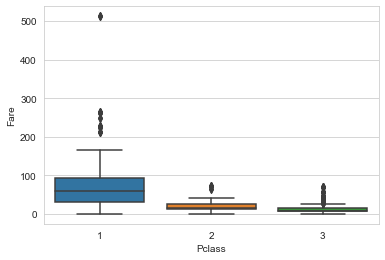

In [22]:
sns.boxplot(x='Pclass',y='Fare',data=train)

# Data cleaning

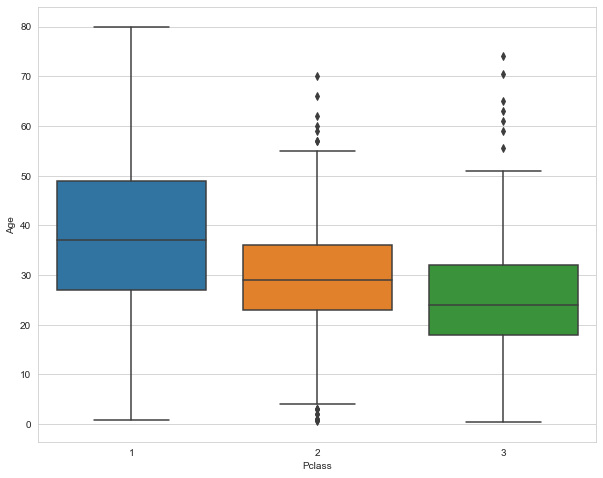

In [25]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Pclass',y='Age',data=train)

In [26]:
def impute_age(col):
    Age=col[0]
    Pclass=col[1]
      
    if pd.isnull(Age):
            if Pclass==1:
                return 37
            if Pclass==2:
                return 29
            if Pclass==3:
                return 24
            
    else:
            return Age

In [28]:
train['Age']= train[['Age','Pclass']].apply(impute_age,axis=1)

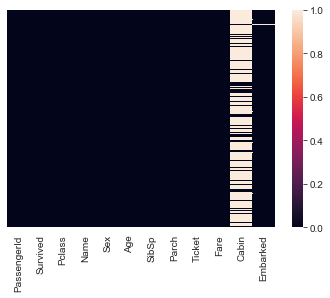

In [29]:
sns.heatmap(train.isnull(),yticklabels=False)

In [30]:
train.drop('Cabin',axis=1,inplace=True)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Converting categorical features

In [98]:
pd.get_dummies(train['Embarked']).head()  #Convert categorical variable into dummy/indicator variables

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [32]:
pd.get_dummies(train['Embarked'],drop_first=True).head() #drop_first=True is to get K-1 dummies out of K categorical features
# by removing the first level

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [41]:
embarked=pd.get_dummies(train['Embarked'],drop_first=True)
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [42]:
train.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [43]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,22.0,1,0,7.2500,NaN
1,2,1,1,38.0,1,0,71.2833,C85
2,3,1,3,26.0,0,0,7.9250,NaN
3,4,1,1,35.0,1,0,53.1000,C123
4,5,0,3,35.0,0,0,8.0500,NaN


In [44]:
train=pd.concat([train,sex,embarked],axis=1)

In [45]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,0,3,22.0,1,0,7.2500,NaN,1,0,1
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0
2,3,1,3,26.0,0,0,7.9250,NaN,0,0,1
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1
4,5,0,3,35.0,0,0,8.0500,NaN,1,0,1


Now data is ready to apply model